<a href="https://colab.research.google.com/github/Ananthalakshmi-k-a/college-demo/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**simple gradient descent**

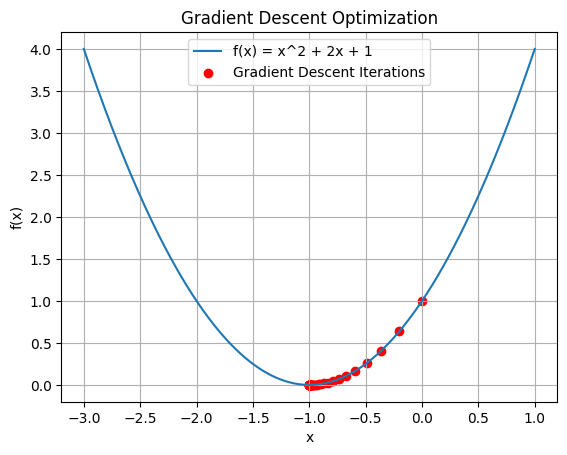

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(func, initial_guess, learning_rate, tolerance, max_iterations):

    x = initial_guess
    x_values = [x]
    y_values = [func(x)]

    for i in range(max_iterations):
        gradient = (func(x + 0.0001) - func(x)) / 0.0001  # Approximating the gradient
        delta_x = -learning_rate * gradient
        x_new = x + delta_x

        if abs(x_new - x) < tolerance:
            break

        x = x_new
        x_values.append(x)
        y_values.append(func(x))

    return x_values, y_values

def example_function(x):
    return x**2 + 2*x + 1

initial_guess = 0
learning_rate = 0.1
tolerance = 0.0001
max_iterations = 1000

x_values, y_values = gradient_descent(example_function, initial_guess, learning_rate, tolerance, max_iterations)

x = np.linspace(-3, 1, 400)
y = example_function(x)
plt.plot(x, y, label='f(x) = x^2 + 2x + 1')
plt.scatter(x_values, y_values, color='red', label='Gradient Descent Iterations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.grid(True)
plt.show()


**stochastic gradient**

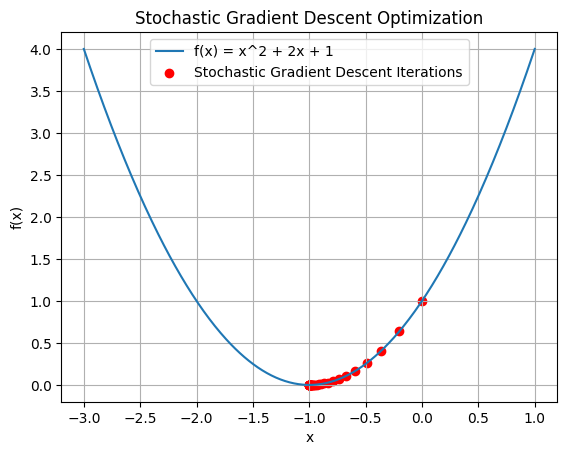

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_gradient_descent(func, gradient_func, initial_guess, learning_rate, tolerance, max_iterations):
    x = initial_guess
    x_values = [x]
    y_values = [func(x)]

    for i in range(max_iterations):
        gradient = gradient_func(x)
        delta_x = -learning_rate * gradient
        x_new = x + delta_x

        if abs(x_new - x) < tolerance:
            break

        x = x_new
        x_values.append(x)
        y_values.append(func(x))

    return x_values, y_values
def example_function(x):
    return x**2 + 2*x + 1
def example_gradient_function(x):
    return 2 * x + 2

initial_guess = 0
learning_rate = 0.1
tolerance = 0.0001
max_iterations = 1000

x_values, y_values = stochastic_gradient_descent(example_function, example_gradient_function, initial_guess, learning_rate, tolerance, max_iterations)

x = np.linspace(-3, 1, 400)
y = example_function(x)
plt.plot(x, y, label='f(x) = x^2 + 2x + 1')
plt.scatter(x_values, y_values, color='red', label='Stochastic Gradient Descent Iterations')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Stochastic Gradient Descent Optimization')
plt.legend()
plt.grid(True)
plt.show()


**mini batch gradient**

**Gradient Descent**

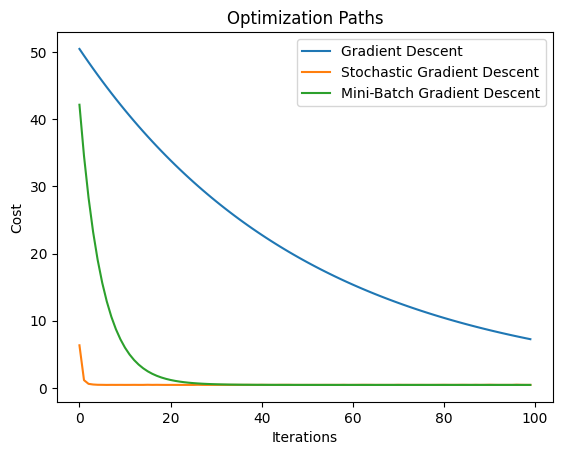

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for _ in range(iterations):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient
        cost = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
        costs.append(cost)
    return theta, costs

def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for _ in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradient
        cost = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
        costs.append(cost)
    return theta, costs

def mini_batch_gradient_descent(X, y, batch_size=10, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros(n)
    costs = []
    for _ in range(iterations):
        for i in range(0, m, batch_size):
            xi = X[i:i+batch_size]
            yi = y[i:i+batch_size]
            gradient = (1/batch_size) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradient
        cost = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
        costs.append(cost)
    return theta, costs


np.random.seed(0)
X = 2 * np.random.rand(100, 3)
y = 4 + np.dot(X, np.array([3, 2, 1])) + np.random.randn(100)


X = (X - X.mean(axis=0)) / X.std(axis=0)
X_b = np.c_[np.ones((100,1)), X]


theta_gd, costs_gd = gradient_descent(X_b, y)

theta_sgd, costs_sgd = stochastic_gradient_descent(X_b, y)

theta_mbgd, costs_mbgd = mini_batch_gradient_descent(X_b, y)


plt.plot(np.arange(len(costs_gd)), costs_gd, label='Gradient Descent')
plt.plot(np.arange(len(costs_sgd)), costs_sgd, label='Stochastic Gradient Descent')
plt.plot(np.arange(len(costs_mbgd)), costs_mbgd, label='Mini-Batch Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Optimization Paths')
plt.legend()
plt.show()